In [1]:
import tradingeconomics as te
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
te.login('jupyter:jupyter') # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

In [3]:

raw_data_vaccination = te.getIndicatorData(country='all', indicators='Coronavirus Vaccination total', output_type='df')
raw_data_population = te.getIndicatorData(country='all', indicators='population', output_type='df')


In [4]:
vaccination_data = raw_data_vaccination[['Country','LatestValue']].rename(columns = {'LatestValue': 'Unit Doses'}).set_index('Country')
vaccination_data['Doses Given (Million)'] =  round(vaccination_data['Unit Doses'] / 1000000, 2)
vaccination_data = vaccination_data.drop(['World','European Union'])

population_data = raw_data_population[['Country','LatestValue']].rename(columns = {'LatestValue': 'Population (Million)'}).set_index('Country')
population_data = population_data.drop(['Euro Area','European Union'])

df = pd.merge(population_data,vaccination_data, on='Country')
df = df.drop(columns='Unit Doses')

df['Doses for Final Target (Million)'] = round(round(df['Population (Million)'] * 2 ,2)- df['Doses Given (Million)'],2)

df.sort_values(['Doses Given (Million)'], ascending=False, inplace=True)

df = df.head(10)

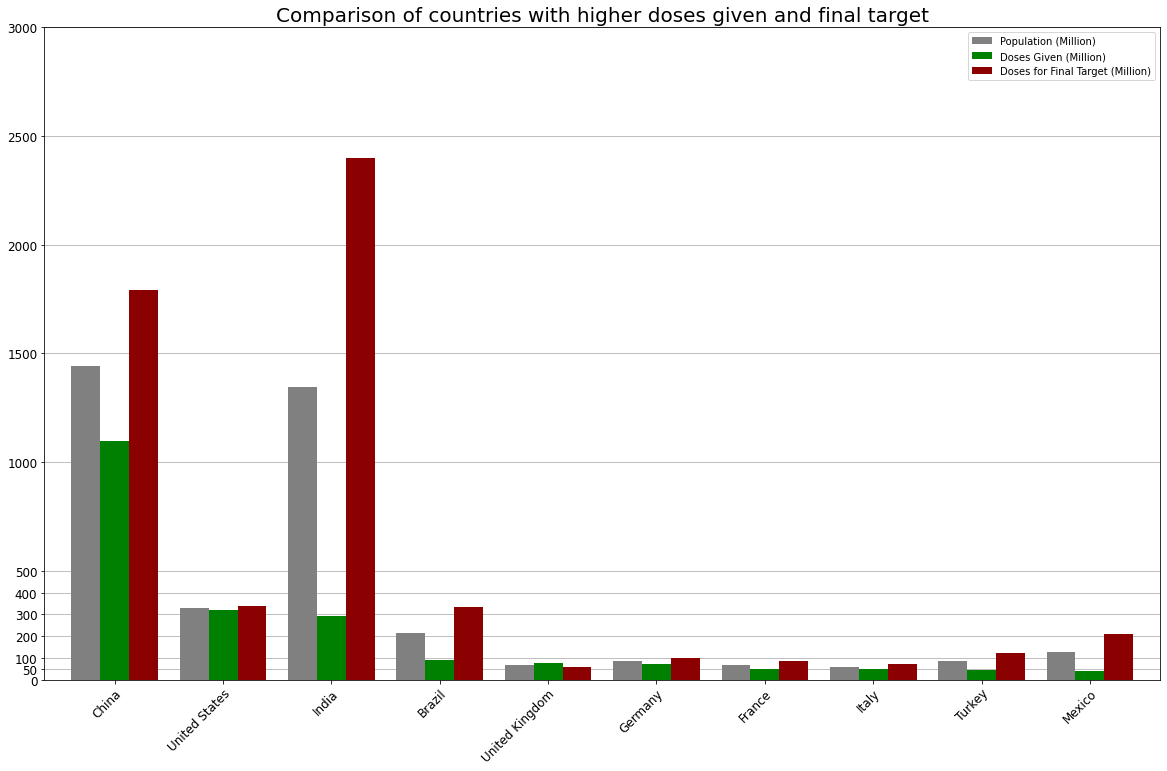

In [5]:
color_dict = {'Population (Million)': 'grey', 'Doses Given (Million)': 'green', 'Doses for Final Target (Million)': 'darkred'}

df.plot(
    figsize=(20, 12),
    kind='bar',
    zorder=3,
    color=[color_dict.get(x, '#333333') for x in df.columns],
    fontsize=12,
    width= 0.8
)


ax = plt.gca()

plt.setp(
    ax.get_xticklabels(),
    rotation=45,
    ha='right',
    rotation_mode='anchor',
    fontsize=12
)

ax.yaxis.grid(zorder=0)
plt.yticks(list(plt.yticks()[0]) + [50, 100, 200, 300, 400])

ax.set_title('Comparison of countries with higher doses given and final target', color='black', size=20)
plt.xlabel('')
plt.show()